In [1]:
import os
import json
import matplotlib.pyplot as plt
from scipy import stats
import pickle

from matplotlib import rcParams
import numpy as np
import seaborn as sns

rcParams["font.family"] = "serif"
rcParams["grid.linestyle"] = ':'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["legend.fontsize"] = 9
rcParams["axes.labelsize"] = 20
rcParams["axes.titlesize"] = 20
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15

In [2]:
results_dir = '../zero_shot_evaluations'
let_it_wag_results = '../let_it_wag_datasets/evaluations'

## Class only results

In [3]:
res_path = os.path.join(results_dir, '{}_{}_results.json'.format('imagenet', 'ensemble'))
with open(res_path, 'r') as f:
    imagenet_results = json.load(f)
imagenet_results = {k:v['full'] for k,v in imagenet_results.items()}

print(len(imagenet_results))
imagenet_results.pop('backboneViT-B-32_pretrainedlaion200m_train_test_sim_normalized')

21


38.554

In [4]:
res_liw_path = os.path.join(let_it_wag_results, '{}_{}_results.json'.format('let_it_wag_combined', 'ensemble'))
with open(res_liw_path, 'r') as f:
    liw_results = json.load(f)
liw_results = {k:v['full'] for k,v in liw_results.items()}
print(len(liw_results))

40


In [5]:
print(len(liw_results))
for k in liw_results:
    if k not in imagenet_results:
        print(k)

# taken from here: https://github.com/mlfoundations/open_clip/blob/main/docs/openclip_classification_results.csv
imagenet_results['backboneRN50_pretrainedopenai'] = 59.82
imagenet_results['backboneRN101_pretrainedopenai'] = 62.28
imagenet_results['backboneViT-B-32_pretrainedopenai'] = 63.32
imagenet_results['backboneViT-B-16_pretrainedsiglip'] = 78.49
imagenet_results['backboneViT-B-16_pretrainedopenai'] = 68.34
imagenet_results['backboneViT-L-14_pretrainedopenai'] = 75.54
imagenet_results['backboneSO400M_pretrainedsiglip'] = 83.44
imagenet_results['backboneViT-L-16_pretrainedsiglip'] = 82.07

imagenet_results['backboneViT-B-32_pretrainedmetaclip400m'] = 65.58
imagenet_results['backboneViT-B-32_pretrainedcommonpool'] = 23.04
imagenet_results['backboneViT-B-16_pretraineddfn'] = 76.24
imagenet_results['backboneViT-B-16_pretrainedcommonpool'] = 57.77
imagenet_results['backboneViT-L-14_pretrainedcommonpool'] = 76.37
imagenet_results['backboneViT-H-14_pretraineddfn'] = 83.44
imagenet_results['backboneViT-B-32_pretrainedmetaclip2.5b'] = 67.66
imagenet_results['backboneViT-B-16_pretrainedmetaclip400m'] = 70.80
imagenet_results['backboneViT-B-16_pretrainedmetaclip2.5b'] = 72.12
imagenet_results['backboneViT-L-14_pretrainedmetaclip400m'] = 76.20
imagenet_results['backboneViT-L-14_pretrainedmetaclip2.5b'] = 79.17
imagenet_results['backboneViT-H-14_pretrainedmetaclip2.5b'] = 80.51


40
backboneRN50_pretrainedopenai
backboneRN101_pretrainedopenai
backboneViT-B-32_pretrainedopenai
backboneViT-B-16_pretrainedsiglip
backboneViT-B-16_pretrainedopenai
backboneViT-L-14_pretrainedopenai
backboneSO400M_pretrainedsiglip
backboneViT-L-16_pretrainedsiglip
backboneViT-B-32_pretrainedmetaclip400m
backboneViT-B-32_pretrainedcommonpool
backboneViT-B-16_pretraineddfn
backboneViT-B-16_pretrainedcommonpool
backboneViT-L-14_pretrainedcommonpool
backboneViT-H-14_pretraineddfn
backboneViT-B-32_pretrainedmetaclip2.5b
backboneViT-B-16_pretrainedmetaclip400m
backboneViT-B-16_pretrainedmetaclip2.5b
backboneViT-L-14_pretrainedmetaclip400m
backboneViT-L-14_pretrainedmetaclip2.5b
backboneViT-H-14_pretrainedmetaclip2.5b


In [6]:
print(len(imagenet_results))
print(len(liw_results))

40
40


In [7]:
sorted_imagenet_vals = []
sorted_liw_vals = []
sorted_all = []
for k in sorted(imagenet_results.keys()):
    # print(k, 'imagenet', imagenet_results[k], 'liw', liw_results[k])
    sorted_imagenet_vals.append(imagenet_results[k])
    sorted_liw_vals.append(liw_results[k])
    dataset = k.split('_')[-1].replace('pretrained', '')
    model_size = k.split('_')[0].replace('backbone', '')
    sorted_all.append((model_size, dataset, imagenet_results[k], liw_results[k]))
print(sorted_all)

[('RN101', 'openai', 62.28, 31.888122605363986), ('RN101', 'yfcc15m', 34.046, 15.199233716475096), ('RN50', 'cc12m', 33.144, 8.92183908045977), ('RN50', 'cc3m', 20.094, 3.73639846743295), ('RN50', 'openai', 59.82, 31.930268199233716), ('RN50', 'yfcc15m', 31.888, 13.154789272030651), ('SO400M', 'siglip', 83.44, 67.32260536398468), ('ViT-B-16', 'cc12m', 37.392, 11.491954022988505), ('ViT-B-16', 'cc3m', 17.106, 3.0114942528735633), ('ViT-B-16', 'commonpool', 57.77, 20.970114942528735), ('ViT-B-16', 'datacomp', 73.484, 52.89655172413793), ('ViT-B-16', 'dfn', 76.24, 56.593869731800766), ('ViT-B-16', 'laion2b', 70.22, 44.213793103448275), ('ViT-B-16', 'laion400m', 67.028, 39.135632183908044), ('ViT-B-16', 'metaclip2.5b', 72.12, 49.32030651340996), ('ViT-B-16', 'metaclip400m', 70.8, 46.509578544061306), ('ViT-B-16', 'openai', 68.34, 37.85593869731801), ('ViT-B-16', 'siglip', 78.49, 54.635249042145595), ('ViT-B-16', 'synthci30m', 30.67, 9.150191570881226), ('ViT-B-16', 'yfcc15m', 37.884, 19.25

0.6030346846828196
1.5776268224701806


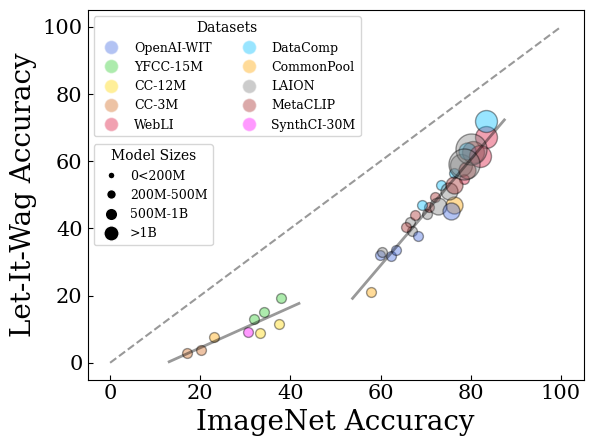

In [8]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

plt.figure()

colors = {
    'openai': 'royalblue',           # Deep blue
    'yfcc15m': 'limegreen',          # Bright green
    'cc12m': 'gold',                 # Bright yellow
    'cc3m': 'chocolate',             # Brown
    'siglip': 'crimson',             # Deep red
    'datacomp': 'deepskyblue',       # Sky blue
    # 'dfn': 'deepskyblue',                # Bright pink/purple
    'commonpool': 'orange',          # Bright orange
    # 'laion400m': 'grey',       # Deep purple
    # 'laion2b': 'grey',               # Grey
    'laion': 'grey',
    # 'metaclip2.5b': 'brown',         # Black
    # 'metaclip400m': 'brown',        # Brownish red
    'metaclip': 'brown',
    'synthci30m': 'magenta',            # Bright blue-green
}

cors_map = {
    'openai': 'OpenAI-WIT',
    'yfcc15m': 'YFCC-15M',
    'cc12m': 'CC-12M',
    'cc3m': 'CC-3M',
    'siglip': 'WebLI',
    'datacomp': 'DataComp',
    'commonpool': 'CommonPool',
    'laion': 'LAION',
    'metaclip': 'MetaCLIP',
    'synthci30m': 'SynthCI-30M',
}

sizes = {
    'RN50': '0<200M',
    'RN101': '0<200M',
    'ViT-B-32': '0<200M',
    'ViT-B-16': '0<200M',
    'ViT-L-14': '200M-500M',
    'ViT-H-14': '500M-1B',
    'ViT-g-14': '>1B',
    'ViT-bigG-14': '>1B',
    'ViT-L-16': '500M-1B',
    'SO400M': '500M-1B',
}

size_categories = {
    '0<200M': 50,
    '200M-500M': 150,
    '500M-1B': 250,
    '>1B': 500,
}

x_values_1 = [sorted_all[ind][2] for ind in range(len(sorted_all)) if sorted_all[ind][2] < 50]
y_values_1 = [sorted_all[ind][3] for ind in range(len(sorted_all)) if sorted_all[ind][2] < 50]

A_1 = np.vstack([x_values_1, np.ones(len(x_values_1))]).T
m_1, c_1 = np.linalg.lstsq(A_1, y_values_1, rcond=None)[0]
print(m_1)

x_line_1 = np.array([min(x_values_1)-4, max(x_values_1)+4])
y_line_1 = m_1 * x_line_1 + c_1
plt.plot(x_line_1, y_line_1, c='black', label='Fitted line 1', alpha=0.4, linewidth=2)

x_values_2 = [sorted_all[ind][2] for ind in range(len(sorted_all)) if sorted_all[ind][2] > 50]
y_values_2 = [sorted_all[ind][3] for ind in range(len(sorted_all)) if sorted_all[ind][2] > 50]

A_2 = np.vstack([x_values_2, np.ones(len(x_values_2))]).T
m_2, c_2 = np.linalg.lstsq(A_2, y_values_2, rcond=None)[0]
print(m_2)

x_line_2 = np.array([min(x_values_2)-4, max(x_values_2)+4])
y_line_2 = m_2 * x_line_2 + c_2
plt.plot(x_line_2, y_line_2, c='black', label='Fitted line 2', alpha=0.4, linewidth=2)

for ind in sorted_all:

    # Adjust the color key based on the grouped categories
    color_key = ind[1]
    if color_key in ['laion400m', 'laion2b']:
        color_key = 'laion'
    elif color_key in ['metaclip2.5b', 'metaclip400m']:
        color_key = 'metaclip'
    elif color_key == 'dfn':
        color_key = 'datacomp'
    
    plt.scatter(ind[2], ind[3], c=colors[color_key], alpha=0.4, s=size_categories[sizes[ind[0]]], edgecolors='black')
plt.plot([0, 100], [0, 100], linestyle='dashed', color='black', alpha=0.4)
# plt.grid()
plt.xlabel('ImageNet Accuracy')
plt.ylabel('Let-It-Wag Accuracy')

# Create custom circle markers for the color legend
circle_legends = [Line2D([0], [0], marker='o', color='w', label=cors_map[label], 
                         markersize=10, markerfacecolor=color, linestyle='None', alpha=0.4) for label, color in colors.items()]

# Model sizes legend
size_legends = [
    Line2D([0], [0], marker='o', color='w', label='0<200M', markersize=5, markerfacecolor='k', linestyle='None'),
    Line2D([0], [0], marker='o', color='w', label='200M-500M', markersize=7, markerfacecolor='k', linestyle='None'),
    Line2D([0], [0], marker='o', color='w', label='500M-1B', markersize=9, markerfacecolor='k', linestyle='None'),
    Line2D([0], [0], marker='o', color='w', label='>1B', markersize=11, markerfacecolor='k', linestyle='None')
]

# Display the legends
# legend1 = plt.legend(handles=circle_legends, title="Datasets", loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
# plt.legend(handles=size_legends, title="Model Sizes", loc='center left', bbox_to_anchor=(1, 0.5), handletextpad=0.5, handlelength=2)

legend1 = plt.legend(handles=circle_legends, title="Datasets", loc='upper left', bbox_to_anchor=(0, 1), ncol=2)
plt.legend(handles=size_legends, title="Model Sizes", loc='center left', bbox_to_anchor=(0, 0.5), handletextpad=0.5, handlelength=2)

plt.gca().add_artist(legend1)  # Re-add the first legend

# plt.xlim(0, 90)
# plt.ylim(0, 90)

# plt.savefig('./plots/eccv-paper-let-it-wag-eval.png', dpi=500, bbox_inches='tight', transparent=True)
plt.savefig('./plots/eccv-paper-let-it-wag-eval-legends.png', dpi=500, bbox_inches='tight', transparent=True)